In [1]:
import os

In [2]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [3]:
# download the tiny shakespeare dataset
sufix="4maps_nonalpha"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_4maps_nonalpha_2sE_dataset_pretokenize/output_4maps_nonalpha_2sE.train.txt


In [4]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [5]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [6]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [7]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


/opt/anaconda3/envs/gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [9]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [10]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [11]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [12]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

B: 1224
C: 1017
A: 990
AAABBB: 972
AAAABBBBB: 965
D: 948
AAABBBB: 942
AAAABBB: 926
AAAABBBB: 926
AAAACCCC: 923
AAABBBBB: 922
AAAAABBBB: 914
AAACCC: 888
CCCCCCCCCC: 886
DDDDDDDDDD: 885
DDDDBBBB: 874
AAAAABBBBB: 869
DDDDDDDDDDD: 860
DDDDBBB: 859
DDDBBBB: 859
DDDDDDDDD: 858
DDDBBB: 858
AAAAAABBBB: 854
AABBB: 854
DD: 852
AAAAABBB: 848
AAACCCC: 845
AAAAABBBBBB: 828
CCCCCCCCC: 827
AAAABBBBBB: 826
DDDDDBBBB: 817
CCCCCCCCCCCC: 817
AAADDD: 815
DDDDDDDDDDDD: 814
AAABBBBBB: 813
DDDDDD: 812
AAABB: 806
CCCBBB: 802
CCCCCCCCCCC: 801
AAAACCC: 798
CC: 797
AAAACCCCC: 794
DDDBBBBB: 792
CCCCBBBB: 787
DDDDCCC: 780
AAAAAABBBBB: 777
AAAAACCCC: 767
AAACC: 766
DDDDDDDDDDDDD: 765
DDDCCCC: 765
DDDDBBBBB: 763
DDDCCC: 757
CCCCCCC: 756
AAACCCCC: 755
DDDDDDD: 754
AAAADDDD: 751
AAAAACCCCC: 751
CCCCBBB: 749
AAAAACCC: 747
CCCCCCCC: 747
CCCCCCCCCCCCC: 744
AAAAAAABBBB: 744
CCCCBBBBB: 740
DDDDDDDDDDDDDD: 740
AAAAAABBB: 737
DDDBB: 734
AAAAAAAAAAAAAAAA: 733
AAAAAABBBBBB: 732
AAAABBBBBBB: 730
AAABBBBBBB: 727
CCCCCBBBBB: 727


In [13]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

7: 1224
8: 1017
6: 990
55: 972
93: 965
9: 948
70: 942
65: 926
68: 926
82: 923
106: 922
92: 914
57: 888
50: 886
48: 885
76: 874
109: 869
52: 860
75: 859
84: 859
44: 858
58: 858
125: 854
98: 854
12: 852
112: 848
89: 845
143: 828
45: 827
122: 826
115: 817
62: 817
64: 815
59: 814
132: 813
33: 812
87: 806
63: 802
56: 801
78: 798
13: 797
114: 794
129: 792
74: 787
91: 780
140: 777
117: 767
96: 766
69: 765
104: 765
119: 763
71: 757
39: 756
146: 755
38: 754
83: 751
142: 751
73: 749
135: 747
21: 747
72: 744
157: 744
134: 740
80: 740
148: 737
108: 734
36: 733
165: 732
152: 730
162: 727
127: 727
99: 725
32: 719
113: 717
133: 713
145: 707
101: 703
131: 702
23: 701
118: 698
107: 695
11: 693
86: 689
100: 684
172: 681
105: 680
147: 677
163: 677
95: 675
154: 673
177: 673
160: 673
97: 670
121: 668
144: 660
94: 657
186: 656
198: 656
124: 654
187: 653
20: 652
60: 650
116: 650
173: 646
102: 643
136: 641
210: 640
149: 635
178: 635
79: 635
88: 634
175: 633
164: 631
193: 630
153: 627
199: 627
191: 625
174: 62

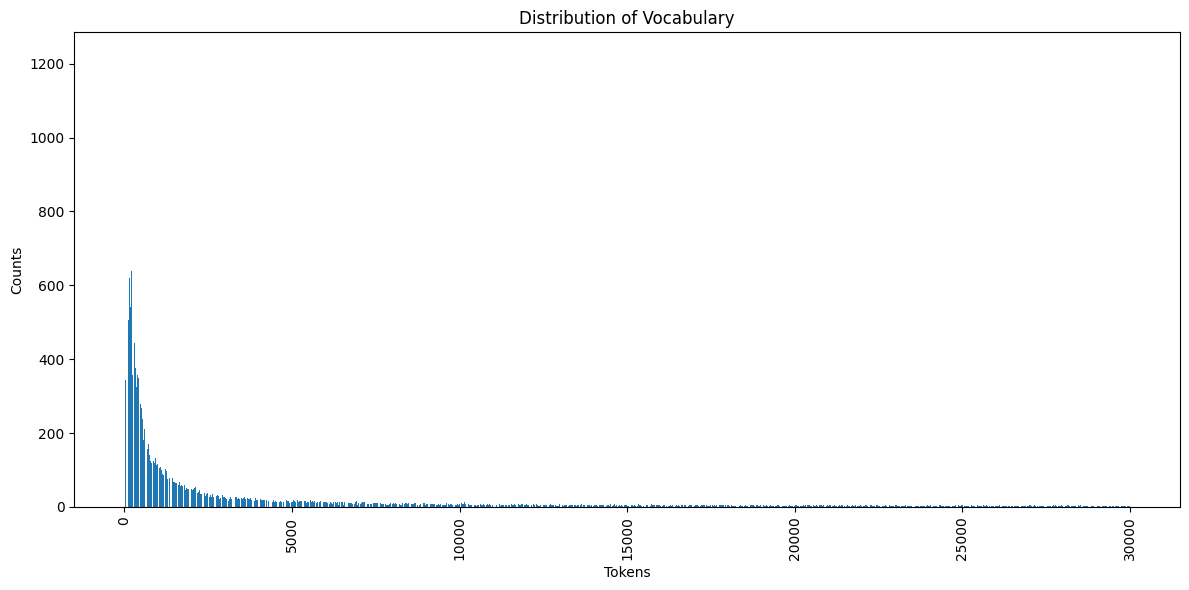

In [14]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


/tmp/ipykernel_33754/671189041.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


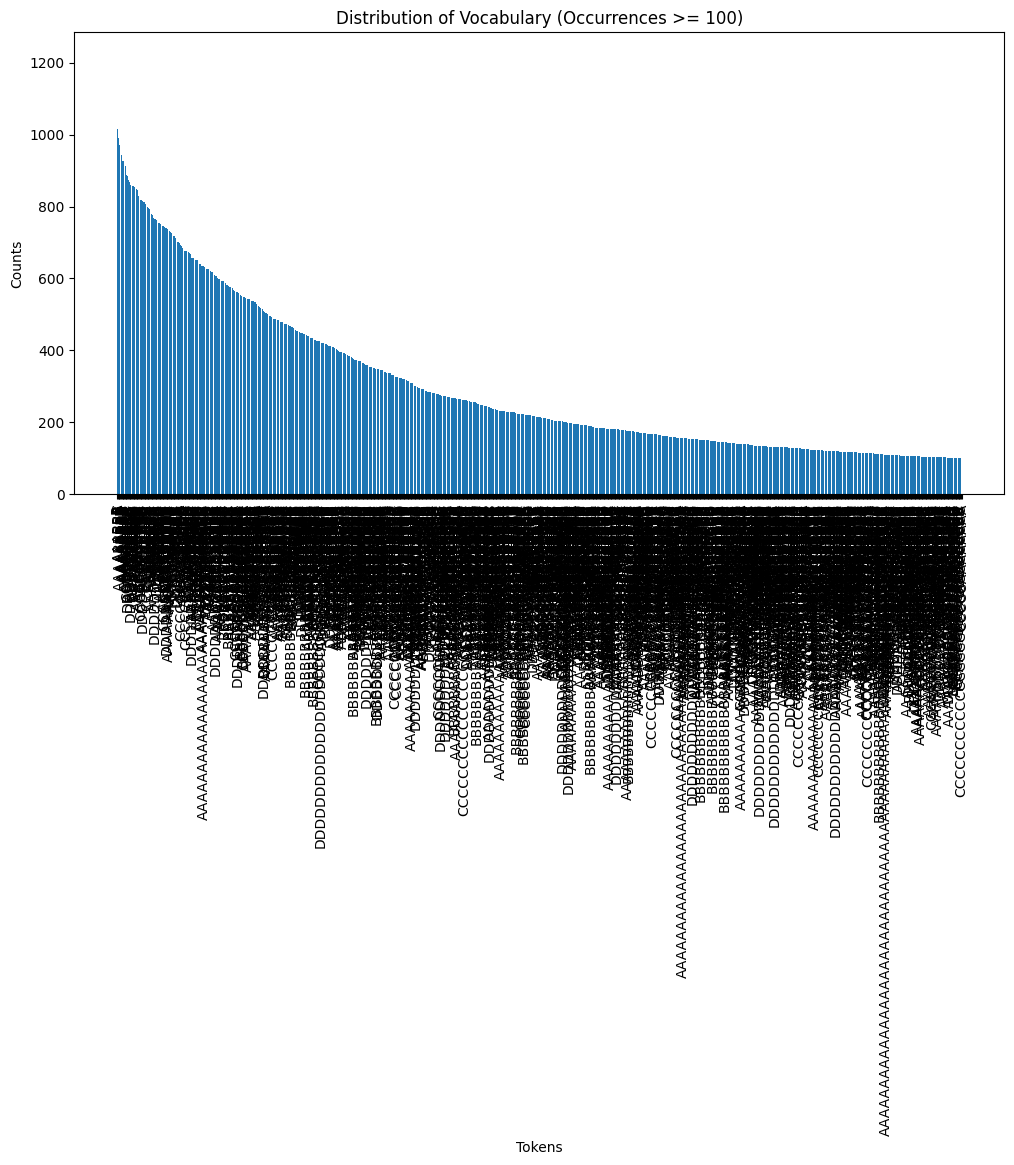

In [16]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 1074
vocab_count_decoded: 28710
recommended size vocab: 1131


In [18]:
#whole dataset
#filtered_vocab_count: 1920
#vocab_count_decoded: 28952
#recommended size vocab: xxxx

